### TPC7: Análise de dados: Alunos

Descarregue o ficheiro de dados: `alunos.csv`
Crie um programa em Python, conjunto de funções, que responda às seguintes questões:
* ((Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;))
* Crie uma função que calcula a distribuição dos alunos por curso;
* Crie uma função que calcula a média das notas de cada aluno e acrescenta essa nova coluna no dataset em memória;
* Considere os seguintes escalões de notas: E [1-4], D [5-8], C [9-12], B [13-16], A [17-20], acrescente uma coluna ao dataset com o escalão correspondente a cada aluno;
* Crie uma distribuição dos alunos por escalão;
* Crie uma função que apresenta na forma dum gráfico de linha uma distribuição;
* Crie uma função que imprime na forma de uma tabela uma distribuição;
* Especifique um programa que, ciclicamente, apresenta um menu com todas funcionalidades ao utilizador.

In [2]:
import csv

def LerInformacao(filename):
    header = []
    lista_alunos = []
    
    with open (filename , 'r' , encoding= "utf-8") as file:
        csvreader = csv.DictReader(file)
        
        for aluno in csvreader:
            lista_alunos.append(aluno)       
    return lista_alunos


lista_alunos = LerInformacao('alunos.csv')
print(lista_alunos)



[{'id_aluno': 'a1', 'nome': 'Aysha Melanie Gilberto', 'curso': 'LEI', 'tpc1': '12', 'tpc2': '8', 'tpc3': '19', 'tpc4': '8'}, {'id_aluno': 'a2', 'nome': 'Igor André Cantanhede', 'curso': 'ENGFIS', 'tpc1': '12', 'tpc2': '16', 'tpc3': '18', 'tpc4': '20'}, {'id_aluno': 'a3', 'nome': 'Laurénio Narciso', 'curso': 'ENGFIS', 'tpc1': '8', 'tpc2': '14', 'tpc3': '15', 'tpc4': '14'}, {'id_aluno': 'a4', 'nome': 'Jasnoor Casegas', 'curso': 'LCC', 'tpc1': '14', 'tpc2': '20', 'tpc3': '17', 'tpc4': '11'}, {'id_aluno': 'a5', 'nome': 'Tawseef Rebouças', 'curso': 'ENGBIOM', 'tpc1': '13', 'tpc2': '14', 'tpc3': '13', 'tpc4': '17'}, {'id_aluno': 'a6', 'nome': 'Eryk Clementino', 'curso': 'LEI', 'tpc1': '10', 'tpc2': '19', 'tpc3': '11', 'tpc4': '14'}, {'id_aluno': 'a7', 'nome': 'Ianna Noivo', 'curso': 'ENGBIOM', 'tpc1': '15', 'tpc2': '15', 'tpc3': '17', 'tpc4': '16'}, {'id_aluno': 'a8', 'nome': 'Ayla Thaissa Reina', 'curso': 'ENGBIOM', 'tpc1': '12', 'tpc2': '8', 'tpc3': '8', 'tpc4': '18'}, {'id_aluno': 'a9', '

In [3]:
def num_alunos_curso(lista_alunos):
    
    dict_cursos = {}
    
    for aluno in lista_alunos:
        curso = aluno['curso']
        
        if dict_cursos.get(curso) == None:
            dict_cursos[curso] = 1

        else:
            dict_cursos[curso] = dict_cursos[curso] + 1
    
    return dict_cursos

num_alunos_curso(lista_alunos)          

{'LEI': 23, 'ENGFIS': 32, 'LCC': 20, 'ENGBIOM': 25}

In [4]:
def media_notas(lista_alunos):
    
    for aluno in lista_alunos:
        
        media = (int(aluno['tpc1']) + int(aluno['tpc2']) + int(aluno['tpc3']) + int(aluno['tpc4'])) / 4
        aluno['media'] = media    
        
    return lista_alunos

#media_notas(lista_alunos)

In [5]:
def escaloes(lista_alunos):
    
    for aluno in lista_alunos:
        if aluno.get('media') != None:
            
            if 1 <= aluno['media'] and aluno['media'] < 5:
                aluno['escalao'] = 'E'
            elif 5 <= aluno['media'] and aluno['media']< 9:
                aluno['escalao'] = 'D'
            elif 9 <= aluno['media'] and aluno['media']< 13:
                aluno['escalao'] = 'C'
            elif 13 <= aluno['media'] and aluno['media']< 17:
                aluno['escalao'] = 'B'
            elif 17 <= aluno['media'] and aluno['media']<= 20:
                aluno['escalao'] = 'A'
                
    return lista_alunos

#escaloes(lista_alunos)


In [6]:
def num_alunos_escalao(lista_alunos):
    dict_escaloes = {}
    
    for aluno in lista_alunos:
        if aluno.get('escalao') != None:
            
            escalao = aluno['escalao']
            
            if dict_escaloes.get(escalao) == None:
                dict_escaloes[escalao] = 1

            else:
                dict_escaloes[escalao] = dict_escaloes[escalao] + 1
    
    return dict_escaloes 

num_alunos_escalao(lista_alunos)
    

{}

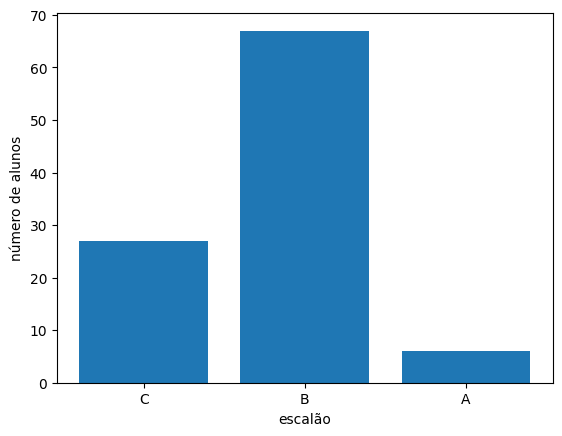

In [14]:
import matplotlib.pyplot as plt

def grafico(distribuicao,abcissas,ordenadas):
    x = distribuicao.keys()
    y = distribuicao.values()
    
    plt.bar(x, y)
    
    plt.xlabel(abcissas)

    plt.ylabel(ordenadas)
    
    plt.show()
    
dist_escaloes = num_alunos_escalao(lista_alunos)
dist_cursos = num_alunos_curso(lista_alunos)  
grafico (dist_escaloes,"escalão","número de alunos") 


In [15]:
def imprime_tabela(distribuicao,abcissas,ordenadas):
    print(f"| {abcissas:20} | {ordenadas:20} |")
    
    for k,v in distribuicao.items():
        print(f"| {k[:20]:20} | {str(v)[:20]:20} |") 
        
imprime_tabela(dist_escaloes,"escalao","num_aluno")

| escalao              | num_aluno            |
| C                    | 27                   |
| B                    | 67                   |
| A                    | 6                    |


In [9]:
def menu():
    print('---------MENU---------')
    print('1- número de alunos por curso')
    print('2- acrescentar média')
    print('3- acrescentar escalão de acordo com a média')
    print('4- gráfico de distibuições')
    print('5- tabela de distribuições')
    print('6-SAIR', flush=True)
    opcao = int(input('escolha a opção'))
    return

---------MENU---------
1- número de alunos por curso
2- acrescentar média
3- acrescentar escalão de acordo com a média
4- gráfico de distibuições
5- tabela de distribuições
6-SAIR
[{'id_aluno': 'a1', 'nome': 'Aysha Melanie Gilberto', 'curso': 'LEI', 'tpc1': '12', 'tpc2': '8', 'tpc3': '19', 'tpc4': '8', 'media': 11.75}, {'id_aluno': 'a2', 'nome': 'Igor André Cantanhede', 'curso': 'ENGFIS', 'tpc1': '12', 'tpc2': '16', 'tpc3': '18', 'tpc4': '20', 'media': 16.5}, {'id_aluno': 'a3', 'nome': 'Laurénio Narciso', 'curso': 'ENGFIS', 'tpc1': '8', 'tpc2': '14', 'tpc3': '15', 'tpc4': '14', 'media': 12.75}, {'id_aluno': 'a4', 'nome': 'Jasnoor Casegas', 'curso': 'LCC', 'tpc1': '14', 'tpc2': '20', 'tpc3': '17', 'tpc4': '11', 'media': 15.5}, {'id_aluno': 'a5', 'nome': 'Tawseef Rebouças', 'curso': 'ENGBIOM', 'tpc1': '13', 'tpc2': '14', 'tpc3': '13', 'tpc4': '17', 'media': 14.25}, {'id_aluno': 'a6', 'nome': 'Eryk Clementino', 'curso': 'LEI', 'tpc1': '10', 'tpc2': '19', 'tpc3': '11', 'tpc4': '14', 'media

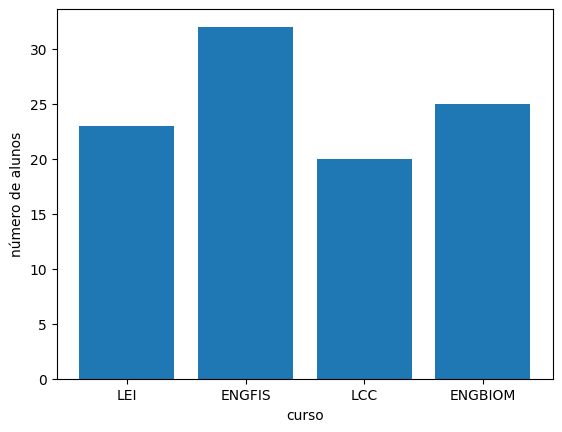

---------MENU---------
1- número de alunos por curso
2- acrescentar média
3- acrescentar escalão de acordo com a média
4- gráfico de distibuições
5- tabela de distribuições
6-SAIR


In [12]:
print('---------MENU---------')
print('1- número de alunos por curso')
print('2- acrescentar média')
print('3- acrescentar escalão de acordo com a média')
print('4- gráfico de distibuições')
print('5- tabela de distribuições')
print('6-SAIR', flush=True)

opcao = int(input('escolha a opção'))

lista_alunos = LerInformacao('alunos.csv')

if opcao == 1:
    print(num_alunos_curso(lista_alunos))
    menu()
    
if opcao == 2:
    print(media_notas(lista_alunos))
    print('---------MENU---------')
    print('1- número de alunos por curso')
    print('2- acrescentar média')
    print('3- acrescentar escalão de acordo com a média')
    print('4- gráfico de distibuições')
    print('5- tabela de distribuições')
    print('6-SAIR', flush=True)
    opcao = int(input('escolha a opção'))
    
if opcao == 3:
    print(escaloes(lista_alunos))    
    print('---------MENU---------')
    print('1- número de alunos por curso')
    print('2- acrescentar média')
    print('3- acrescentar escalão de acordo com a média')
    print('4- gráfico de distibuições')
    print('5- tabela de distribuições')
    print('6-SAIR', flush=True)
    opcao = int(input('escolha a opção'))
    
if opcao == 4:
    print('ESCOLHA UMA DISTRIBUIÇÃO:')
    print('1- alunos por curso')
    print('2- alunos por escalão')
    distribuicao_escolhida= int(input('escolha a distribuição a ser representada'))
    
    if distribuicao_escolhida == 1:
        dist_cursos = num_alunos_curso(lista_alunos)  
        grafico (dist_cursos,"curso","número de alunos")
        menu()
        
    if distribuicao_escolhida == 2:
        dist_escaloes = num_alunos_escalao(lista_alunos)  
        grafico (dist_escaloes,"escalão","número de alunos")
        menu()        
        
if opcao == 5:
    print('ESCOLHA UMA DISTRIBUIÇÃO:')
    print('1- alunos por curso')
    print('2- alunos por escalão')
    distribuicao_Escolhida= int(input('escolha a distribuição a ser representada'))
    
    if distribuicao_Escolhida == 1:
        dist_cursos = num_alunos_curso(lista_alunos)  
        imprime_tabela (dist_cursos,"curso","número de alunos")
        menu()
        
    if distribuicao_Escolhida == 2:
        dist_escaloes = num_alunos_escalao(lista_alunos)  
        imprime_tabela (dist_escaloes,"escalão","número de alunos")
        menu()        

if opcao == 6:
    print('TERMINADO')